In [1]:
import os
import pandas as pd
import numpy as np
import re
from json import load
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
from pprint import PrettyPrinter
import dirtyjson
from statistics import mean, pstdev
pp = PrettyPrinter(indent=2)

plot_infos = {
    'sudoku':{
        'marker':'o',
        'color':'red'
    },
    'cluster':{
        'marker':'s',
        'color':'magenta'
    },
    'menage':{
        'marker':'+',
        'color':'blue'
    },
    'cars':{
        'marker':'x',
        'color':'lime'
    },
    'queens':{
        'marker':'*',
        'color':'green'
    },
    'langford':{
        'marker':'o',
        'color':'orange'
    },
    'ex':{
        'marker':'s',
        'color':'black'
    },
    'graceful':{
        'marker':'+',
        'color':'purple'
    }
}

# markers list : https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.markers.MarkerStyle.html#matplotlib.markers.MarkerStyle
# color list : https://matplotlib.org/3.1.0/gallery/color/named_colors.html

In [14]:
results_dir = 'results_tmp'
names = os.listdir(results_dir)
results = []
for name in names:
    filename = results_dir + '/' + name
    with open(filename) as f:
        entries = load(f)['results']
        for e in entries:
            for p in e['parameters']:
                e['p_'+p] = e['parameters'][p]
            del e['parameters']
        results.extend(entries)

df = pd.DataFrame(results)
df['category'] = df['p_file'].apply(lambda x: re.split(r'[_\-.0-9]',x)[0])
knuth = df[df.p_ex=='dlx2']
solnon = df[df.p_ex=='xcc-with-dancing-cells']

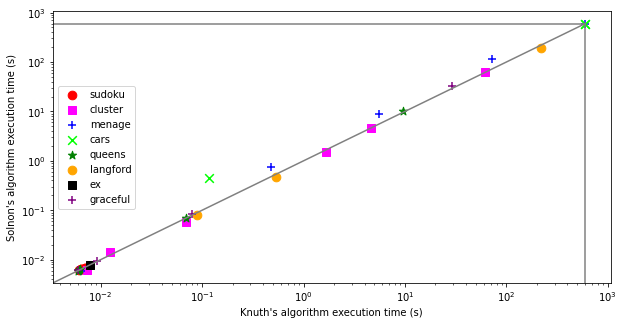

Each point above the diagonal means that Knuth's is better than Solnon's.
Each point under the diagonal means that Solnon's is better than Knuth's.
Each point on the diagonal means that both are equal.


In [15]:
plt.figure(figsize=(10,5))
plt.yscale('log')
plt.xscale('log')

#plt.scatter(knuth['mean'],solnon['mean'],c=solnon.color,cmap='tab10',marker='+')
for g in solnon.category.unique():
    s = solnon[solnon['category']==g]
    k = knuth[knuth['category']==g]
    try:
        plot_infos[g]
    except:
        print("No plot information for this category. Please fill the plot_infos dict at the beginning of the code.")
    plt.scatter(k['mean'], s['mean'], c = plot_infos[g]['color'],marker= plot_infos[g]['marker'],label = g,s=75.0)
plt.legend()
plt.xlabel("Knuth's algorithm execution time (s)")
plt.ylabel("Solnon's algorithm execution time (s)")
plt.plot([0,600],[0,600],color='grey') #diag line
plt.plot([0,600],[600,600],color='grey') #top line
plt.plot([0,0],[600,0],color='grey') #left line
plt.plot([0,600],[0,0],color='grey') #bottom line
plt.plot([600,600],[0,600],color='grey') #right line
plt.savefig('knuth_vs_solnon.jpg')
plt.show()


print("Each point above the diagonal means that Knuth's is better than Solnon's.")
print("Each point under the diagonal means that Solnon's is better than Knuth's.")
print("Each point on the diagonal means that both are equal.")

In [3]:

results_dir = 'results/cars'
names = os.listdir(results_dir)
results = []
for name in names:
    filename = results_dir + '/' + name
    with open(filename) as f:
        entries = load(f)['results']
        for e in entries:
            for p in e['parameters']:
                e['p_'+p] = e['parameters'][p]
            del e['parameters']
        results.extend(entries)
df = pd.DataFrame(results)
df['category'] = df['p_file'].apply(lambda x: re.split(r'[_\-.0-9]',x)[0])
knuth = df[df.p_ex=='dlx2']
solnon = df[df.p_ex=='xcc-with-sparse-sets']
print(knuth)
print(solnon)

                                                command      mean    stddev  \
0     cat dlx2_cars467.txt | timeout 300s ../bin/dlx...  0.060276  0.000685   
2     cat dlx2_cars208.txt | timeout 300s ../bin/dlx...  0.029003  0.000274   
4     cat dlx2_cars290.txt | timeout 300s ../bin/dlx...  0.204932  0.007330   
6     cat dlx2_cars39.txt | timeout 300s ../bin/dlx2...  0.034957  0.000622   
8     cat dlx2_cars259.txt | timeout 300s ../bin/dlx...  0.001512  0.000073   
...                                                 ...       ...       ...   
1950  cat dlx2_cars817.txt | timeout 300s ../bin/dlx...  0.035120  0.000456   
1952  cat dlx2_cars995.txt | timeout 300s ../bin/dlx...  0.004519  0.000369   
1954  cat dlx2_cars313.txt | timeout 300s ../bin/dlx...  0.008855  0.000159   
1956  cat dlx2_cars867.txt | timeout 300s ../bin/dlx...  5.248916  0.230995   
1958  cat dlx2_cars207.txt | timeout 300s ../bin/dlx...  0.029858  0.000628   

        median      user    system       min       

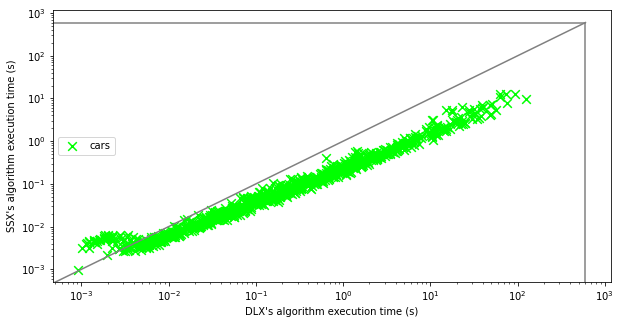

Each point above the diagonal means that Knuth's is better than Solnon's.
Each point under the diagonal means that Solnon's is better than Knuth's.
Each point on the diagonal means that both are equal.


In [4]:
plt.figure(figsize=(10,5))
plt.yscale('log')
plt.xscale('log')

#plt.scatter(knuth['mean'],solnon['mean'],c=solnon.color,cmap='tab10',marker='+')
for g in solnon.category.unique():
    s = solnon[solnon['category']==g]
    k = knuth[knuth['category']==g]
    try:
        plot_infos[g]
    except:
        print("No plot information for this category. Please fill the plot_infos dict at the beginning of the code.")
    plt.scatter(k['mean'], s['mean'], c = plot_infos[g]['color'],marker= plot_infos[g]['marker'],label = g,s=75.0)
plt.legend()
plt.xlabel("DLX's algorithm execution time (s)")
plt.ylabel("SSX's algorithm execution time (s)")
plt.plot([0,600],[0,600],color='grey') #diag line
plt.plot([0,600],[600,600],color='grey') #top line
plt.plot([0,0],[600,0],color='grey') #left line
plt.plot([0,600],[0,0],color='grey') #bottom line
plt.plot([600,600],[0,600],color='grey') #right line
plt.savefig('knuth_vs_solnon_cars.jpg')
plt.show()


print("Each point above the diagonal means that Knuth's is better than Solnon's.")
print("Each point under the diagonal means that Solnon's is better than Knuth's.")
print("Each point on the diagonal means that both are equal.")

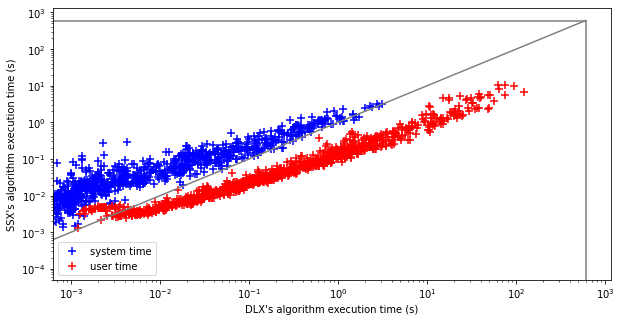

Each point above the diagonal means that Knuth's is better than Solnon's.
Each point under the diagonal means that Solnon's is better than Knuth's.
Each point on the diagonal means that both are equal.


In [5]:
plt.figure(figsize=(10,5))
plt.yscale('log')
plt.xscale('log')

#plt.scatter(knuth['mean'],solnon['mean'],c=solnon.color,cmap='tab10',marker='+')
for g in solnon.category.unique():
    s = solnon[solnon['category']==g]
    k = knuth[knuth['category']==g]
    try:
        plot_infos[g]
    except:
        print("No plot information for this category. Please fill the plot_infos dict at the beginning of the code.")
    plt.scatter(k['system'], s['system'], c = "blue",marker= "+",label = "system time",s=75.0)
    plt.scatter(k['user'], s['user'], c = "red",marker= "+",label = "user time",s=75.0)
plt.legend()
plt.xlabel("DLX's algorithm execution time (s)")
plt.ylabel("SSX's algorithm execution time (s)")
plt.plot([0,600],[0,600],color='grey') #diag line
plt.plot([0,600],[600,600],color='grey') #top line
plt.plot([0,0],[600,0],color='grey') #left line
plt.plot([0,600],[0,0],color='grey') #bottom line
plt.plot([600,600],[0,600],color='grey') #right line
plt.savefig('knuth_vs_solnon_cars_separated.jpg')
plt.show()


print("Each point above the diagonal means that Knuth's is better than Solnon's.")
print("Each point under the diagonal means that Solnon's is better than Knuth's.")
print("Each point on the diagonal means that both are equal.")

In [3]:
results_dir = 'results/cars_ssx_dcx'
names = os.listdir(results_dir)
results = []
for name in names:
    filename = results_dir + '/' + name
    with open(filename) as f:
        entries = load(f)['results']
        for e in entries:
            for p in e['parameters']:
                e['p_'+p] = e['parameters'][p]
            del e['parameters']
        results.extend(entries)
df = pd.DataFrame(results)
df['category'] = df['p_file'].apply(lambda x: re.split(r'[_\-.0-9]',x)[0])
knuth = df[df.p_ex=='xcc-with-dancing-cells']
solnon = df[df.p_ex=='xcc-with-sparse-set']
print(knuth)
print(solnon)

                                                command      mean    stddev  \
1     cat xcc-with-dancing-cells_cars467.txt | timeo...  0.009565  0.000138   
3     cat xcc-with-dancing-cells_cars208.txt | timeo...  0.013115  0.000193   
5     cat xcc-with-dancing-cells_cars290.txt | timeo...  0.030879  0.000793   
7     cat xcc-with-dancing-cells_cars39.txt | timeou...  0.007625  0.000271   
9     cat xcc-with-dancing-cells_cars259.txt | timeo...  0.004523  0.000139   
...                                                 ...       ...       ...   
1947  cat xcc-with-dancing-cells_cars817.txt | timeo...  0.008318  0.000249   
1949  cat xcc-with-dancing-cells_cars995.txt | timeo...  0.003344  0.001290   
1951  cat xcc-with-dancing-cells_cars313.txt | timeo...  0.004319  0.000205   
1953  cat xcc-with-dancing-cells_cars867.txt | timeo...  0.703416  0.004142   
1955  cat xcc-with-dancing-cells_cars207.txt | timeo...  0.016079  0.000402   

        median      user    system       min       

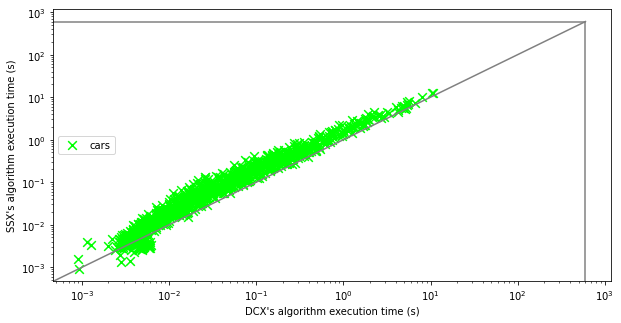

Each point above the diagonal means that Knuth's is better than Solnon's.
Each point under the diagonal means that Solnon's is better than Knuth's.
Each point on the diagonal means that both are equal.


In [4]:
plt.figure(figsize=(10,5))
plt.yscale('log')
plt.xscale('log')

#plt.scatter(knuth['mean'],solnon['mean'],c=solnon.color,cmap='tab10',marker='+')
for g in solnon.category.unique():
    s = solnon[solnon['category']==g]
    k = knuth[knuth['category']==g]
    try:
        plot_infos[g]
    except:
        print("No plot information for this category. Please fill the plot_infos dict at the beginning of the code.")
    plt.scatter(k['mean'], s['mean'], c = plot_infos[g]['color'],marker= plot_infos[g]['marker'],label = g,s=75.0)
plt.legend()
plt.xlabel("DCX's algorithm execution time (s)")
plt.ylabel("SSX's algorithm execution time (s)")
plt.plot([0,600],[0,600],color='grey') #diag line
plt.plot([0,600],[600,600],color='grey') #top line
plt.plot([0,0],[600,0],color='grey') #left line
plt.plot([0,600],[0,0],color='grey') #bottom line
plt.plot([600,600],[0,600],color='grey') #right line
plt.savefig('DCX_vs_DLX_cars.jpg')
plt.show()


print("Each point above the diagonal means that Knuth's is better than Solnon's.")
print("Each point under the diagonal means that Solnon's is better than Knuth's.")
print("Each point on the diagonal means that both are equal.")

In [6]:

results_dir = 'results/cars_memory'
names = os.listdir(results_dir)
results = []
for name in names:
    filename = results_dir + '/' + name
    with open(filename) as f:
        entries = load(f)['results']
        for e in entries:
            for p in e['parameters']:
                e['p_'+p] = e['parameters'][p]
            del e['parameters']
        results.extend(entries)
df = pd.DataFrame(results)
df['category'] = df['p_file'].apply(lambda x: re.split(r'[_\-.0-9]',x)[0])
knuth = df[df.p_ex=='dlx2']
solnon = df[df.p_ex=='xcc-with-sparse-set']
print(knuth)
print(solnon)

                 max_resident_set_size_kb  average_max_resident_set_size_kb  \
0          [2912, 2908, 2908, 2900, 2900]                              2905   
2          [3416, 3432, 3436, 3288, 3280]                              3370   
4          [5736, 5740, 5652, 5616, 5572]                              5663   
6          [2580, 2612, 2692, 2688, 2692]                              2652   
8          [1688, 1616, 1688, 1668, 1696]                              1671   
...                                   ...                               ...   
1950       [2640, 2712, 2572, 2724, 2712]                              2672   
1952       [1804, 1828, 1684, 1812, 1804]                              1786   
1954       [2092, 2208, 2216, 2108, 2068]                              2138   
1956  [89440, 89564, 89608, 89564, 89576]                             89550   
1958       [3864, 3848, 3928, 3928, 3940]                              3901   

      p_ex       p_file category  
0     dlx2  cars

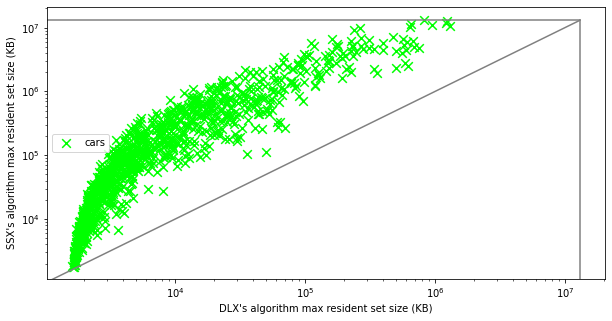

Each point above the diagonal means that Knuth's is better than Solnon's.
Each point under the diagonal means that Solnon's is better than Knuth's.
Each point on the diagonal means that both are equal.


In [7]:
plt.figure(figsize=(10,5))
plt.yscale('log')
plt.xscale('log')

#plt.scatter(knuth['mean'],solnon['mean'],c=solnon.color,cmap='tab10',marker='+')
for g in solnon.category.unique():
    s = solnon[solnon['category']==g]
    k = knuth[knuth['category']==g]
    try:
        plot_infos[g]
    except:
        print("No plot information for this category. Please fill the plot_infos dict at the beginning of the code.")
    plt.scatter(k['average_max_resident_set_size_kb'], s['average_max_resident_set_size_kb'], c = plot_infos[g]['color'],marker= plot_infos[g]['marker'],label = g,s=75.0)
plt.legend()
plt.xlabel("DLX's algorithm max resident set size (KB)")
plt.ylabel("SSX's algorithm max resident set size (KB)")
plt.plot([0,1.3e7],[0,1.3e7],color='grey') #diag line
plt.plot([0,1.3e7],[1.3e7,1.3e7],color='grey') #top line
plt.plot([0,0],[1.3e7,0],color='grey') #left line
plt.plot([0,1.3e7],[0,0],color='grey') #bottom line
plt.plot([1.3e7,1.3e7],[0,1.3e7],color='grey') #right line
plt.savefig('knuth_vs_solnon_cars_memory.jpg')
plt.show()


print("Each point above the diagonal means that Knuth's is better than Solnon's.")
print("Each point under the diagonal means that Solnon's is better than Knuth's.")
print("Each point on the diagonal means that both are equal.")

In [31]:
results_dir = 'results/cars_memory_dcx'
names = os.listdir(results_dir)
results = []
for name in names:
    filename = results_dir + '/' + name
    with open(filename) as f:
        entries = dirtyjson.load(f)['results']
        for e in entries:
            for p in e['parameters']:
                e['p_'+p] = e['parameters'][p]
            del e['parameters']
        results.extend(entries)
df = pd.DataFrame(results)
df['category'] = df['p_file'].apply(lambda x: re.split(r'[_\-.0-9]',x)[0])
knuth = df[df.p_ex=='dlx2']
solnon = df[df.p_ex=='xcc-with-dancing-cells']

ratios = [];
for i in range(0, solnon['p_ex'].count()):
    ratio = solnon._get_value(i, 0, takeable = True)[0] / knuth._get_value(i, 0, takeable = True)[0]
    ratios.append(ratio)


print("average solnon/knuth ratio")
print(mean(ratios))
print("pstdev")

print(pstdev(ratios))
print(knuth)
print(solnon)

average solnon/knuth ratio
1.4495402565929305
pstdev
0.21427754242078823
     max_resident_set_size_kb  average_max_resident_set_size_kb  p_ex  \
0                      [2836]                               567  dlx2   
2                      [3344]                               668  dlx2   
4                      [5732]                              1146  dlx2   
6                      [2664]                               532  dlx2   
8                      [1776]                               355  dlx2   
...                       ...                               ...   ...   
1950                   [2628]                               525  dlx2   
1952                   [1744]                               348  dlx2   
1954                   [2140]                               428  dlx2   
1956                  [89516]                             17903  dlx2   
1958                   [3936]                               787  dlx2   

           p_file category  
0     cars467.txt    

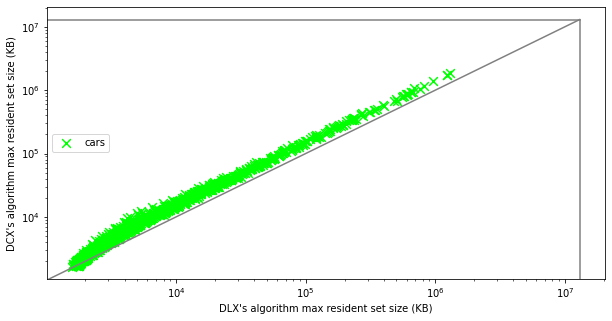

Each point above the diagonal means that Knuth's is better than Solnon's.
Each point under the diagonal means that Solnon's is better than Knuth's.
Each point on the diagonal means that both are equal.


In [5]:
plt.figure(figsize=(10,5))
plt.yscale('log')
plt.xscale('log')

#plt.scatter(knuth['mean'],solnon['mean'],c=solnon.color,cmap='tab10',marker='+')
for g in solnon.category.unique():
    s = solnon[solnon['category']==g]
    k = knuth[knuth['category']==g]
    try:
        plot_infos[g]
    except:
        print("No plot information for this category. Please fill the plot_infos dict at the beginning of the code.")
    plt.scatter(k['average_max_resident_set_size_kb']*5, s['average_max_resident_set_size_kb']*5, c = plot_infos[g]['color'],marker= plot_infos[g]['marker'],label = g,s=75.0)
plt.legend()
plt.xlabel("DLX's algorithm max resident set size (KB)")
plt.ylabel("DCX's algorithm max resident set size (KB)")
plt.plot([0,1.3e7],[0,1.3e7],color='grey') #diag line
plt.plot([0,1.3e7],[1.3e7,1.3e7],color='grey') #top line
plt.plot([0,0],[1.3e7,0],color='grey') #left line
plt.plot([0,1.3e7],[0,0],color='grey') #bottom line
plt.plot([1.3e7,1.3e7],[0,1.3e7],color='grey') #right line
plt.savefig('knuth_vs_solnon_cars_memory_dcx.jpg')
plt.show()


print("Each point above the diagonal means that Knuth's is better than Solnon's.")
print("Each point under the diagonal means that Solnon's is better than Knuth's.")
print("Each point on the diagonal means that both are equal.")